#1)  **Load Packages**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

ModuleNotFoundError: No module named 'scipy'

#2) Load Dataset

In [ ]:
data = pd.read_excel('/content/Strikers_performance.xlsx')
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


#3) Data Cleaning

In [ ]:
# Missing Values
data.isnull().sum()

,0
Striker_ID,0
Nationality,0
Footedness,0
Marital Status,0
Goals Scored,0
Assists,0
Shots on Target,0
Shot Accuracy,0
Conversion Rate,0
Dribbling Success,0


In [ ]:
# Fill Missing Values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data['Movement off the Ball'] = imputer.fit_transform(data[['Goals Scored']])
data['Big Game Performance'] = imputer.fit_transform(data[['Assists']])
data['Penalty Success Rate'] = imputer.fit_transform(data[['Penalty Success Rate']])

#4) Data Types

In [ ]:
# Data Types
data.dtypes

,0
Striker_ID,int64
Nationality,object
Footedness,object
Marital Status,object
Goals Scored,int64
Assists,int64
Shots on Target,int64
Shot Accuracy,float64
Conversion Rate,float64
Dribbling Success,float64


In [ ]:
variables = ['Goals Scored', 'Assists',
             'Shots on Target',
             'Movement off the Ball',
             'Hold-up Play',
             'Aerial Duels Won',
             'Defensive Contribution',
             'Big Game Performance',
             'Impact on Team Performance',
             'Off-field Conduct']

for var in variables:
    data[var] = data[var].astype('int')

data.dtypes

,0
Striker_ID,int64
Nationality,object
Footedness,object
Marital Status,object
Goals Scored,int64
Assists,int64
Shots on Target,int64
Shot Accuracy,float64
Conversion Rate,float64
Dribbling Success,float64


In [ ]:
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,17,71,15,30,10,0.820314,0.922727,8,11
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,14,53,19,26,13,0.803321,0.678984,3,8
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,18,60,20,24,3,0.766540,0.843858,8,9
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,22,60,22,44,9,0.611798,0.662997,6,8
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,13,54,13,37,6,0.701638,0.906538,8,6


#5) Exploratory Data Analysis

In [ ]:
# descriptive analysis
round(data.describe(), 2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,14.52,59.33,19.04,39.47,7.60,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,4.91,10.15,4.95,9.90,2.96,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,0.00,35.00,4.00,8.00,0.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,11.00,52.00,16.00,33.00,6.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,15.00,60.00,19.00,39.50,8.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,18.00,66.00,22.00,46.00,9.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,34.00,92.00,34.00,71.00,15.00,1.00,1.00,13.00,13.00


In [ ]:
# What is the maximum goal scored by an individual striker?
a = max(data["Goals Scored"])
print("Maximum goal scored by an individual striker is:", a)

Maximum goal scored by an individual striker is: 34


In [ ]:
# Count and percentage analysis
freq_Footedness = data['Footedness'].value_counts()
perc_Footedness = freq_Footedness / len(data["Footedness"])*100
print(perc_Footedness , freq_Footedness)

Footedness
Right-footed    53.4
Left-footed     46.6
Name: count, dtype: float64 Footedness
Right-footed    267
Left-footed     233
Name: count, dtype: int64


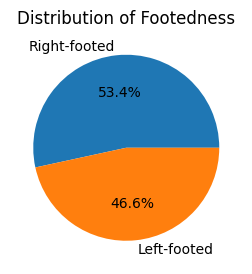

In [ ]:
plt.figure(figsize=(3, 6))
freq_Footedness.plot(kind="pie", autopct='%1.1f%%')
plt.title('Distribution of Footedness')
plt.ylabel('')
plt.show()

In [ ]:
# Which nationality strikers have the highest average number of goals scored?
avg_goals_by_nationality = data.groupby('Nationality')['Goals Scored'].mean().sort_values(ascending=False)
round(avg_goals_by_nationality)

,Goals Scored
Nationality,
Brazil,15.0
Spain,15.0
France,14.0
Germany,14.0
England,14.0


In [ ]:
# What is the average conversion rate for players based on their footedness?
avg_conversion_rate = data.groupby('Footedness')['Conversion Rate'].mean()
avg_conversion_rate

,Conversion Rate
Footedness,
0,0.198086
1,0.200592


In [ ]:
# What is the distribution of players' footedness across different nationalities?
footedned_by_nationality = pd.crosstab(data['Nationality'], data['Footedness'])
footedned_by_nationality

Footedness,Left-footed,Right-footed
Nationality,,
Brazil,42,53
England,50,59
France,42,51
Germany,44,47
Spain,55,57


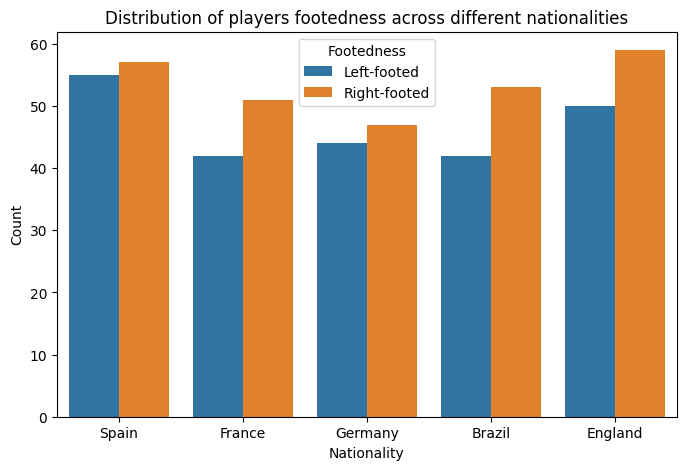

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Nationality', hue='Footedness', data=data)
plt.title('Distribution of players footedness across different nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

#6) Create a correlation matrix

In [ ]:
num_variables = data.select_dtypes(include = ['number']).columns

correl_matrix = round(data[num_variables].corr(), 3)
correl_matrix

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
Striker_ID,1.000,0.025,0.066,0.003,0.018,0.047,-0.031,0.025,-0.036,0.016,0.012,0.066,-0.017,-0.006,-0.027,0.103
Goals Scored,0.025,1.000,-0.071,-0.059,0.066,-0.011,0.034,1.000,0.003,-0.047,0.014,-0.071,0.045,-0.021,0.103,-0.053
Assists,0.066,-0.071,1.000,0.072,-0.020,0.028,0.050,-0.071,-0.046,0.001,-0.011,1.000,-0.007,-0.081,-0.022,-0.015
Shots on Target,0.003,-0.059,0.072,1.000,-0.021,-0.044,0.010,-0.059,-0.102,-0.068,0.011,0.072,0.049,0.029,0.025,0.055
Shot Accuracy,0.018,0.066,-0.020,-0.021,1.000,-0.088,0.023,0.066,-0.044,0.012,0.027,-0.020,0.005,0.017,0.041,0.084
Conversion Rate,0.047,-0.011,0.028,-0.044,-0.088,1.000,-0.020,-0.011,0.059,0.059,-0.002,0.028,0.031,-0.049,-0.031,-0.004
Dribbling Success,-0.031,0.034,0.050,0.010,0.023,-0.020,1.000,0.034,0.002,-0.072,0.015,0.050,-0.030,-0.054,-0.012,-0.060
Movement off the Ball,0.025,1.000,-0.071,-0.059,0.066,-0.011,0.034,1.000,0.003,-0.047,0.014,-0.071,0.045,-0.021,0.103,-0.053
Hold-up Play,-0.036,0.003,-0.046,-0.102,-0.044,0.059,0.002,0.003,1.000,0.080,0.029,-0.046,0.147,0.068,-0.046,0.035
Aerial Duels Won,0.016,-0.047,0.001,-0.068,0.012,0.059,-0.072,-0.047,0.080,1.000,-0.025,0.001,0.047,-0.002,0.043,0.004


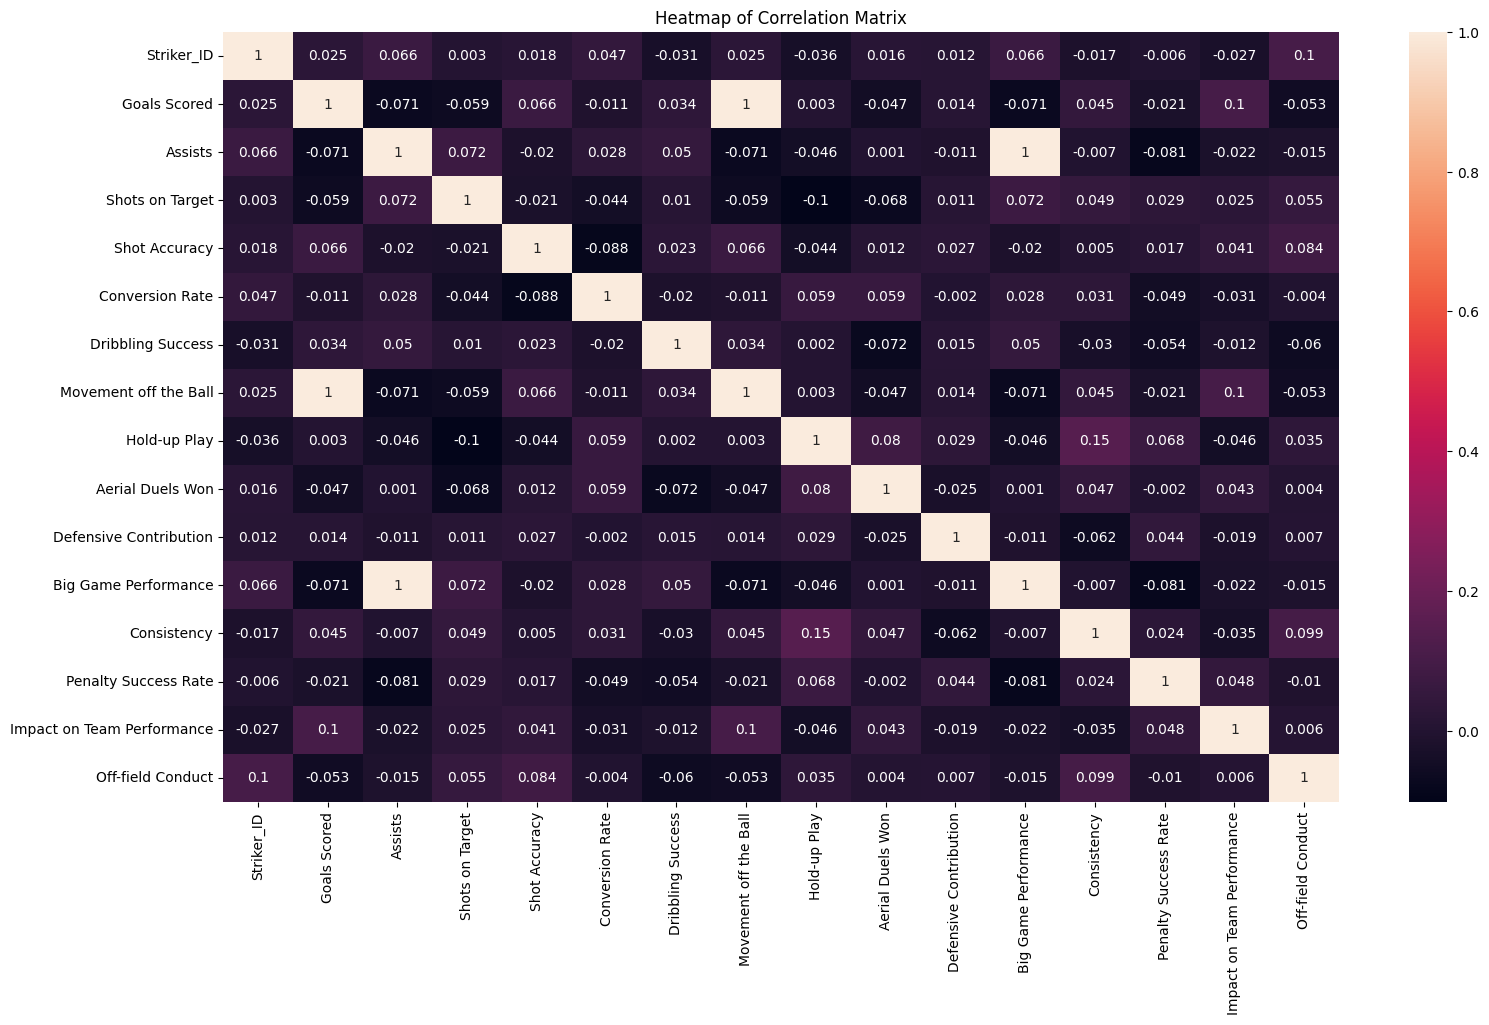

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(correl_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

#7) Statistical Test

In [ ]:
# Find whether there is any significant difference in consistency rates among strikers from various nationality
# Normality test
stat, p_value = shapiro(data['Consistency'])
print('P value: ', round(p_value, 3))

P value:  0.451


In [ ]:
# Filtering data
Spain = data.query('Nationality == "Spain"')['Consistency']
France = data.query('Nationality == "France"')['Consistency']
Germany = data.query('Nationality == "Germany"')['Consistency']
Brazil = data.query('Nationality == "Brazil"')['Consistency']
England = data.query('Nationality == "England"')['Consistency']

In [ ]:
# Levene test for statistics
stats, p_value = levene(Spain, France, Germany, Brazil, England)
print("P value: ", round(p_value, 3))

P value:  0.808


In [ ]:
# One way ANOVA
Test_stat, p_value = f_oneway(Spain, France, Germany, Brazil, England)
print("P value: ", round(p_value, 2))

P value:  0.19


In [ ]:
# Check if there is any significant correlation between strikers' Hold-up play and consistency rate
# Normality test
stat, p_value = shapiro(data['Hold-up Play'])
print('P value: ', round(p_value, 3))

P value:  0.151


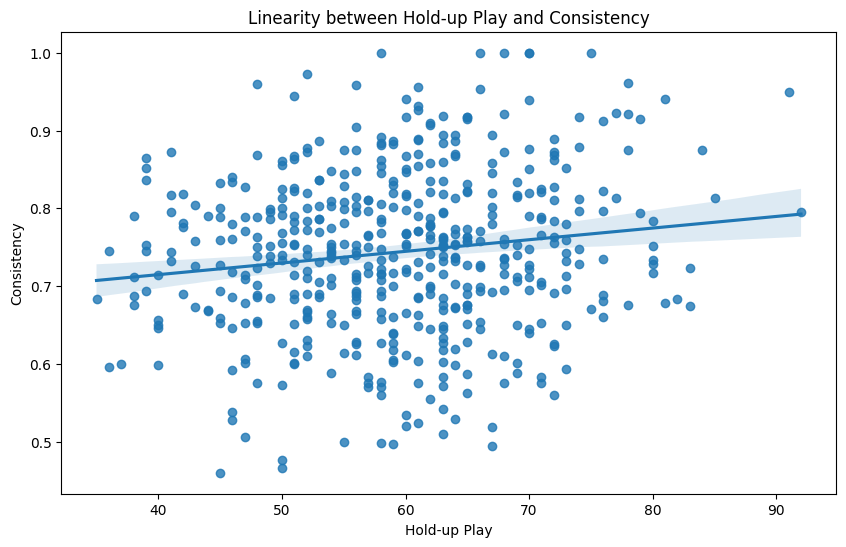

In [ ]:
# Linearity test
plt.figure(figsize = (10, 6))
sns.regplot(x = 'Hold-up Play', y = 'Consistency', data = data)
plt.title('Linearity between Hold-up Play and Consistency')
plt.xlabel('Hold-up Play')
plt.ylabel('Consistency')
plt.show()

In [ ]:
# Pearson correlation
HU_play = data['Hold-up Play']
Consistency = data['Consistency']

corr, p_value = pearsonr(HU_play, Consistency)
print("Correlation coefficient: ", round(corr, 3))
print("P value: ", round(p_value, 3))

Correlation coefficient:  0.147
P value:  0.001


In [ ]:
# Check if strikers' hold-up play significantly influences their consistency rate
x = data['Hold-up Play']
y = data['Consistency']

x_constant = sm.add_constant(x)
model = sm.OLS(y, x_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.93
Date:                Thu, 22 May 2025   Prob (F-statistic):            0.00101
Time:                        13:55:26   Log-Likelihood:                 429.97
No. Observations:                 500   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6548      0.027     24.031   

#8) Feature Engineering

In [ ]:
# Create a new feature - Total contribution score
data['Total contribution score'] = (data['Goals Scored'] + data['Assists']
                                    + data['Shots on Target'] + data['Dribbling Success']
                                    + data['Aerial Duels Won'] + data['Defensive Contribution']
                                    + data['Big Game Performance'] + data['Consistency'])
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,17,71,15,30,10,0.820314,0.922727,8,11,117.577376
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,14,53,19,26,13,0.803321,0.678984,3,8,117.600139
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,18,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,22,60,22,44,9,0.611798,0.662997,6,8,127.250575
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,13,54,13,37,6,0.701638,0.906538,8,6,105.293123


In [ ]:
# Encode the Footedness and marital status by LabelEncoder
encoder = LabelEncoder()
data['Footedness'] = encoder.fit_transform(data['Footedness'])
data['Marital Status'] = encoder.fit_transform(data['Marital Status'])
data.head()


,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,17,71,15,30,10,0.820314,0.922727,8,11,117.577376
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,14,53,19,26,13,0.803321,0.678984,3,8,117.600139
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,18,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,22,60,22,44,9,0.611798,0.662997,6,8,127.250575
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,13,54,13,37,6,0.701638,0.906538,8,6,105.293123


In [ ]:
# Create the dummies for Nationality and add with the data
dummies = pd.get_dummies(data['Nationality'])
processed_df = pd.concat([data, dummies], axis = 1)
processed_df = processed_df.drop('Nationality', axis = 1)
processed_df.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,17,...,0.820314,0.922727,8,11,117.577376,False,False,False,False,True
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,14,...,0.803321,0.678984,3,8,117.600139,False,False,True,False,False
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,18,...,0.766540,0.843858,8,9,94.433410,False,False,False,True,False
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,22,...,0.611798,0.662997,6,8,127.250575,False,False,True,False,False
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,13,...,0.701638,0.906538,8,6,105.293123,False,False,True,False,False


#9) Cluster Analysis

In [ ]:
# Perform KMeans clsutering
# Selecting features
x = processed_df.drop('Striker_ID', axis = 1)

# Calculating WCSS score
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss_score = kmeans.inertia_
    wcss.append(wcss_score)

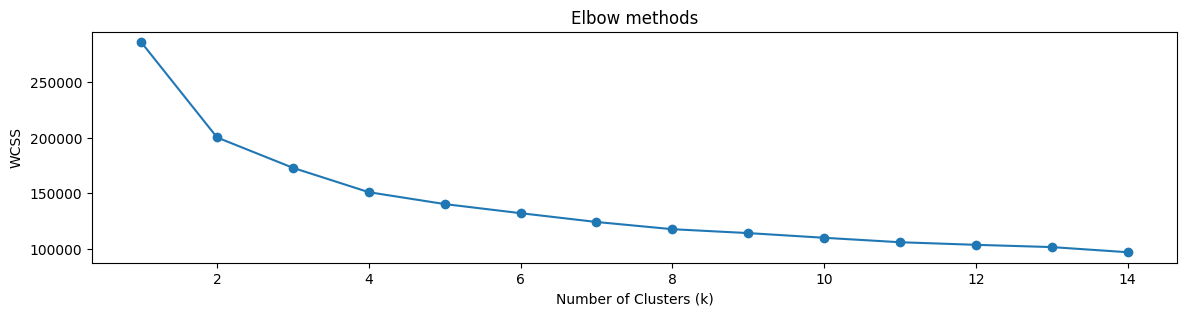

In [ ]:
# Plotting elbow chart
plt.figure(figsize = (14, 3))
plt.plot(range(1, 15), wcss, marker = 'o')
plt.title('Elbow methods')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Building KMeans with k = 2
final_km = KMeans(n_clusters = 2)
final_km.fit(x)

# Generating labels
labels = final_km.labels_
labels

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [ ]:
# Adding labels
processed_df['Clusters'] = labels
processed_df.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain,Clusters
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,17,...,0.922727,8,11,117.577376,False,False,False,False,True,1
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,14,...,0.678984,3,8,117.600139,False,False,True,False,False,0
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,18,...,0.843858,8,9,94.433410,False,False,False,True,False,0
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,22,...,0.662997,6,8,127.250575,False,False,True,False,False,1
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,13,...,0.906538,8,6,105.293123,False,False,True,False,False,0


In [ ]:
# Checking clusters
round(processed_df.groupby('Clusters')['Total contribution score'].mean(), 2)

,Total contribution score
Clusters,
0,102.49
1,125.10


In [ ]:
# Assigning meaningfull names
mapping = {0:'Best strikers', 1:'Regular strikers'}
processed_df['Strikers types'] = processed_df['Clusters'].map(mapping)

In [ ]:
# Deleting the Clusters variable
processed_df = processed_df.drop('Clusters', axis = 1)
processed_df.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain,Strikers types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,17,...,0.922727,8,11,117.577376,False,False,False,False,True,Regular strikers
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,14,...,0.678984,3,8,117.600139,False,False,True,False,False,Best strikers
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,18,...,0.843858,8,9,94.433410,False,False,False,True,False,Best strikers
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,22,...,0.662997,6,8,127.250575,False,False,True,False,False,Regular strikers
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,13,...,0.906538,8,6,105.293123,False,False,True,False,False,Best strikers


#10) Data Preprocessing for ML

In [ ]:
# New feature mapping
mapping = {'Best strikers':1, 'Regular strikers': 0}
processed_df['Strikers types'] = processed_df['Strikers types'].map(mapping)
processed_df.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain,Strikers types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,17,...,0.922727,8,11,117.577376,False,False,False,False,True,0
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,14,...,0.678984,3,8,117.600139,False,False,True,False,False,1
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,18,...,0.843858,8,9,94.433410,False,False,False,True,False,1
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,22,...,0.662997,6,8,127.250575,False,False,True,False,False,0
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,13,...,0.906538,8,6,105.293123,False,False,True,False,False,1


In [ ]:
# Selecting features
x = processed_df.drop(['Striker_ID', 'Strikers types'], axis = 1)
y = processed_df['Strikers types']

In [ ]:
# Scaling features
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_x

array([[-1.07047781, -1.03252879,  0.5050467 , ..., -0.47801802,
        -0.47169258,  1.86125917],
       [-1.07047781,  0.968496  , -0.10638998, ...,  2.09197134,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879,  0.70885893, ..., -0.47801802,
         2.12002488, -0.53727069],
       ...,
       [-1.07047781,  0.968496  , -0.10638998, ..., -0.47801802,
        -0.47169258, -0.53727069],
       [ 0.93416229,  0.968496  , -0.9216389 , ..., -0.47801802,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879, -1.32926335, ..., -0.47801802,
        -0.47169258, -0.53727069]])

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 42)

#11) Predictive Classification Analytics

In [ ]:
# Build a logistic regression machine learning model to predict strikers type
# Model training
lgr_model = LogisticRegression()
lgr_model.fit(x_train, y_train)

#Prediction
y_lgr_pred = lgr_model.predict(x_test)

# Evaluation
accuracy_lgr = accuracy_score(y_test, y_lgr_pred)
print(accuracy_lgr*100,'%')

98.0 %


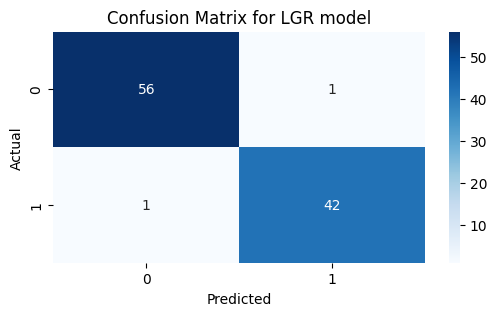

In [142]:
# Creating confusion matrix
conf_matrix_lgr = confusion_matrix(y_test, y_lgr_pred)

# Plotting confusion matrix
plt.figure(figsize = (6, 3))
sns.heatmap(conf_matrix_lgr, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for LGR model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()